In [1]:
# /Users/cn180450/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin

import cv2
import os
import random
random.seed(255)
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # adjustment for histograms
    if kwargs.get("is_histogram", False):
        plt.figure(figsize=figsize)
        plt.plot(image)
    else:
        width=image.shape[1] 
        height=image.shape[0]
        margin=50 
        # dots per inch
        dpi=100.
        # inches
        figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
        #axes ratio
        left = margin/dpi/figsize[0] 
        bottom = margin/dpi/figsize[1]
        fig = plt.figure(figsize=figsize, dpi=dpi)
        fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
        _ = plt.imshow(image, cmap=cmap)
        plt.axis("off")
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    plt.show()
    

### KNN Classifier

In [3]:
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from skimage import exposure
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
mnist = load_digits()

In [11]:
# train, test
x_train, x_test, y_train, y_test = train_test_split(
    np.array(mnist.data), mnist.target, 
    test_size=0.50, random_state=42
)
# train, validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=84
)
print(len(x_train), len(x_val), len(x_test))

808 90 899


In [12]:
k_values = range(1, 30, 2)
accuracies = []

# loop over values of k 
for k in range(1, 30, 2):
    # train
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # evaluate
    score = knn.score(x_val, y_val)
    print("k=%d, accuracy=%.2f%%" % (k, score*100))
    accuracies.append(score)
    
i = int(np.argmax(accuracies))
print("k=%d achieved  highest accuracy of %.2f%% on validation data" % (k_values[i], accuracies[i]*100))

k=1, accuracy=97.78%
k=3, accuracy=98.89%
k=5, accuracy=97.78%
k=7, accuracy=97.78%
k=9, accuracy=97.78%
k=11, accuracy=98.89%
k=13, accuracy=97.78%
k=15, accuracy=96.67%
k=17, accuracy=95.56%
k=19, accuracy=96.67%
k=21, accuracy=96.67%
k=23, accuracy=95.56%
k=25, accuracy=95.56%
k=27, accuracy=95.56%
k=29, accuracy=95.56%
k=3 achieved  highest accuracy of 98.89% on validation data


In [9]:
# retrain using best k value
model = KNeighborsClassifier(n_neighbors=k_values[i])
model.fit(x_train, y_train)
y_hat = model.predict(x_test)


print("Classification Report")
print(classification_report(y_test, y_hat))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



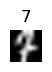

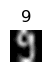

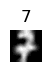

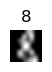

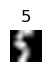

In [10]:
# loope over predictions and visualize

for i in list(map(int, np.random.randint(0, high=len(x_test), size=(5, )))):
    # fetch image
    image = x_test[i]
    prediction = model.predict(image.reshape(1, -1))[0]
    
    # convert the image for a 64 dim array to an 8x8 image
    image = image.reshape((8, 8)).astype("uint8")
    iamge = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
    
    display(image, flip=False, cmap="gray", title=str(prediction))